# Importing the required Python libraries:

---



In [52]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools

# Loading and normalizing data:

---



In [53]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/225.0, x_test/225.0

# Building and Training the model:

---

In [54]:
model = tf.keras.models.Sequential([
                                     tf.keras.layers.Flatten(input_shape=(28,28)),
                                     tf.keras.layers.Dense(100, activation='relu'),
                                     tf.keras.layers.Dropout(0.2),
                                     tf.keras.layers.Dense(10, activation='softmax')
])

In [55]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
r=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5024 - accuracy: 0.8555 - val_loss: 0.1466 - val_accuracy: 0.9571
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1654 - accuracy: 0.9511 - val_loss: 0.1116 - val_accuracy: 0.9658
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1202 - accuracy: 0.9638 - val_loss: 0.0881 - val_accuracy: 0.9721
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1004 - accuracy: 0.9688 - val_loss: 0.0794 - val_accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0845 - accuracy: 0.9736 - val_loss: 0.0814 - val_accuracy: 0.9742
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0778 - accuracy: 0.9756 - val_loss: 0.0744 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0682 - accuracy: 0.9781 - val_loss: 0.0717 - val_accuracy:

# Visualisation of Loss and Accuraacy of trained model:

---



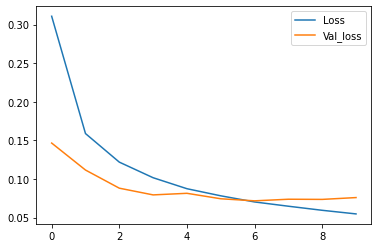

In [57]:
import matplotlib.pyplot as plt 
plt.plot(r.history['loss'],label='Loss')
plt.plot(r.history['val_loss'],label='Val_loss')
plt.legend()

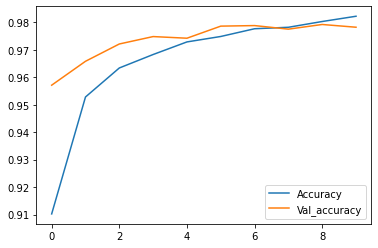

In [58]:
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'],label='Val_accuracy')
plt.legend()

# Evaluating the model:

---



In [59]:
model.evaluate(x_test, y_test)
p_test = model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9782


# Confusion matrix and printing missclassified samples:

---



confusion matrix without Normalization


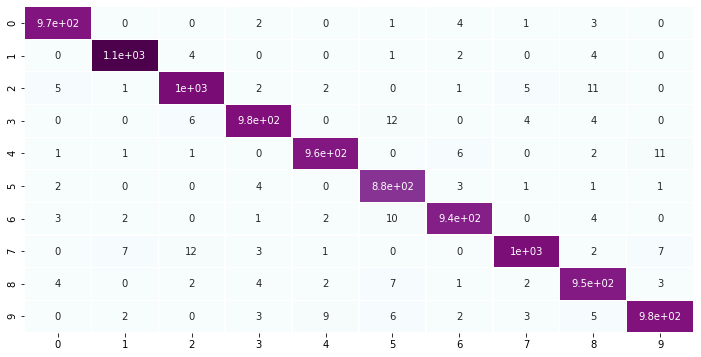

In [67]:
print('confusion matrix without Normalization')
cm = confusion_matrix(y_test, p_test)
plt.figure(figsize=(12, 6))
sns.heatmap(cm, linecolor='white', linewidths=0.2, annot=True, cmap="BuPu", cbar=None)

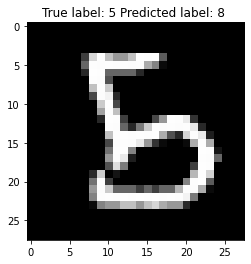

In [61]:
misclassified_index = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_index)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted label: %s ' % (y_test[i],p_test[i]));